# Python Tutorial for LinkUp Data

You should install the following packages (through `pip install`) prior to proceeding:
* **matplotlib** (http://matplotlib.org)
* **numpy** (http://www.numpy.org)
* **pandas** (http://pandas.pydata.org)
* **seaborn** (http://seaborn.pydata.org)
* **sklearn** (http://scikit-learn.org/stable/)

Tutorial links (if they exist) are listed above in parentheses next to their respective packages.

Finally, you can get nice geographic maps by installing **basemap**:

`pip install https://github.com/matplotlib/basemap/archive/v1.0.7rel.tar.gz`

If this does not work for you, first install Anaconda by following the instructions in one of the following links:

* https://docs.continuum.io/anaconda/install
* https://conda.io/docs/install/full.html

and then running `conda install basemap`.

The **basemap** package is very sophisticated and has lots of options. Here are some helpful links:

* http://matplotlib.org/basemap/
* http://www.datadependence.com/2016/06/creating-map-visualisations-in-python/
* http://basemaptutorial.readthedocs.io/en/latest/

In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as skl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Brief tutorial on how to read companies and jobs data into pandas dataframes

For faster reads, consider saving these files locally instead of using the web endpoints.

In [2]:
companies = pd.read_csv("https://s3-us-west-2.amazonaws.com/correlation1-public/DukeDatathon2017/companies.csv")

In [3]:
companies.head()

,company_id,name,last_scrape_date,first_scrape_date,city,state,country,ticker_main,ticker_ric,entity_id,bloomberg_id,scraping_url,trc_business_sector,trc_economic_sector,trc_industry_sector,trc_industry_group
0,1,Target,4/17/17,12/11/07,Minneapolis,MN,US,22560.0,TGT,TGT.N,TGT,http://www.target.com,Retailers,Consumer Cyclicals,Discount Stores,Diversified Retail
1,2,General Mills Inc.,4/17/17,11/24/07,Minneapolis,MN,US,24428.0,GIS,GIS.N,GIS,http://www.generalmills.com,Food & Beverages,Consumer Non-Cyclicals,Food Processing,Food & Tobacco
2,3,Ecolab Inc.,4/17/17,8/20/08,Saint Paul,MN,US,23051.0,ECL,ECL.N,ECL,http://www.ecolab.com,Chemicals,Basic Materials,Specialty Chemicals,Chemicals
3,5,Wilsons Leather,4/17/17,11/14/08,Brooklyn Park,MN,US,108000693.0,PRVU,PRVU.PK,PRVU,http://www.wilsonsleather.com/,NaN,NaN,NaN,NaN
4,6,Hawkins Chemical,4/16/17,6/30/08,Minneapolis,MN,US,25234.0,HWKN,HWKN.OQ,HWKN,http://www.hawkinsinc.com,Chemicals,Basic Materials,Diversified Chemicals,Chemicals


In [4]:
companies[companies.name=="Target"]

,company_id,name,last_scrape_date,first_scrape_date,city,state,country,ticker_main,ticker_ric,entity_id,bloomberg_id,scraping_url,trc_business_sector,trc_economic_sector,trc_industry_sector,trc_industry_group
0,1,Target,4/17/17,12/11/07,Minneapolis,MN,US,22560.0,TGT,TGT.N,TGT,http://www.target.com,Retailers,Consumer Cyclicals,Discount Stores,Diversified Retail
22508,28031,Target,4/16/17,5/8/13,Melbourne,State of Victoria,AU,102033625.0,TEX.AX,TEX.AX,NaN,http://www.target.com.au/,Energy - Fossil Fuels,Energy,Oil & Gas Exploration and Production,Oil & Gas


In [5]:
jobs = pd.read_csv("https://s3-us-west-2.amazonaws.com/correlation1-public/DukeDatathon2017/jobs.csv.gz", compression='gzip')

In [6]:
jobs.head()

,id,company_id,company_name,title,created_date,last_checked_date,city,state,zip,country,category_id,category_name
0,000000082858d2d0b2c0d9a130cdf016,11198,Aaron's Inc,Customer Service Representative,2016-04-09,2016-04-18,Anderson,SC,29626.0,US,35,Customer Service
1,00000520d6171c37caac84175c482fd0,371,Sears Holdings Corporation,Sr. Counsel Vendor Management and Specialty R...,2008-12-06,2008-12-06,Schaumburg,IL,60196.0,US,127,Retail
2,0000078d0016e320c88a93c2b3214457,4202,Community Health System,Support Services Team Specialist,2016-08-01,2016-08-08,Fort Wayne,IN,46801.0,US,98,Maintenance & Repair
3,00000b134a1e36de0f7ce6de06bb95fe,4503,Tenet Healthcare Corporation,CERTIFIED NURSING ASST MED&#92;TELE FULL TIME ...,2010-06-28,2010-07-05,Delray Beach,FL,33444.0,US,50,Health & Medical
4,00000b7009c78a8a609c98c83443dd08,4503,Tenet Healthcare Corporation,TECH-ULTRASOUND - PER DIEM,2009-08-01,2009-08-03,West Palm Beach,FL,33412.0,US,0,NaN


### Demonstration plot: How has the number of new job postings in technology changed over time?

We will produce a plot in two steps:
1. Take the jobs data and filter it by job category for technology
2. Group the filtered data by create_date, take daily counts, and then create a 2-D plot

In [7]:
jobs_in_tech = jobs[jobs.category_name=='Technology']
by_day = jobs_in_tech.groupby('created_date')

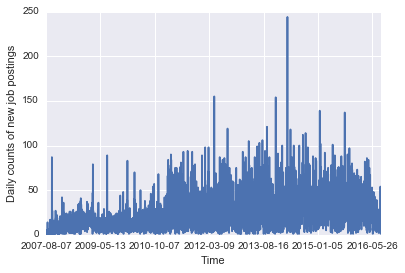

In [8]:
ax = by_day['category_name'].count().plot()
ax.set_xlabel('Time')
ax.set_ylabel('Daily counts of new job postings')